In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [96]:
import tensorflow as tf
import os
print("The Tensorflow version: {}".format(tf.__version__))
import keras
print("The Keras version : {}".format(keras.__version__))
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style="white",context='notebook',palette='deep')

The Tensorflow version: 2.2.0-rc2
The Keras version : 2.3.1


In [0]:
mdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/digit-recognizer/train.csv')
tdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/digit-recognizer/test.csv')

In [98]:
mdata.shape

(42000, 785)

In [99]:
tdata.shape

(28000, 784)

In [100]:
mdata.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [0]:
Y_train=mdata['label']
X_train=mdata.drop(labels=['label'],axis=1)

In [102]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

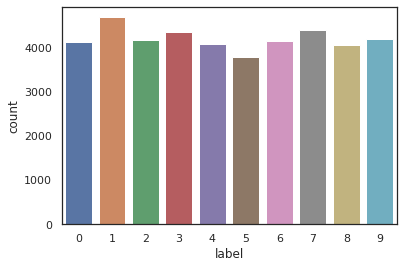

In [104]:
sns.countplot(Y_train)

In [105]:
print("Null values present in training  data :\n",X_train.isnull().any().describe())
print("\n")
print("Null values present in test  data :\n",tdata.isnull().any().describe())

Null values present in training  data :
 count       784
unique        1
top       False
freq        784
dtype: object


Null values present in test  data :
 count       784
unique        1
top       False
freq        784
dtype: object


In [0]:
X_train=X_train/255.0
tdata=tdata/255.0

In [0]:
X_train=X_train.values.reshape(-1,28,28,1)
tdata=tdata.values.reshape(-1,28,28,1)

In [0]:
Y_train=to_categorical(Y_train,num_classes=10)

In [0]:
random_seed=2
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.1,
                                             random_state=random_seed)

In [110]:
print("The shape of training set: {}".format(X_train.shape))
print("The shape of label set: {}".format(Y_train.shape))
print("The shape of train validation set: {}".format(X_val.shape))
print("The shape of label validation set: {}".format(Y_val.shape))

The shape of training set: (37800, 28, 28, 1)
The shape of label set: (37800, 10)
The shape of train validation set: (4200, 28, 28, 1)
The shape of label validation set: (4200, 10)


[]

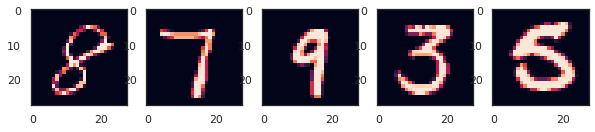

In [111]:
plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(X_train[0][:,:,0])
plt.plot()

plt.subplot(1,5,2)
plt.imshow(X_train[1][:,:,0])
plt.plot()

plt.subplot(1,5,3)
plt.imshow(X_train[2][:,:,0])
plt.plot()

plt.subplot(1,5,4)
plt.imshow(X_train[3][:,:,0])
plt.plot()

plt.subplot(1,5,5)
plt.imshow(X_train[4][:,:,0])
plt.plot()

In [0]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,input_shape=(28,28,1),kernel_size=(5,5),padding="Same",activation="relu"))
model.add(keras.layers.Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation="softmax"))

In [0]:
optimizer=keras.optimizers.RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)

In [0]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
learing_rate_reduction=ReduceLROnPlateau(monitor="val_accuracy",patience=3,verbose=1,
                                         factor=0.5,min_lr=0.00001)

In [0]:
epochs=3
batch_size=86

In [0]:
datagen=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(X_train)

In [118]:
history=model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                            epochs=epochs,validation_data=(X_val,Y_val),verbose=2,
                           steps_per_epoch=X_train.shape[0],callbacks=[learing_rate_reduction])

Epoch 1/3
 - 883s - loss: 0.0931 - accuracy: 0.9785 - val_loss: 0.0900 - val_accuracy: 0.9890
Epoch 2/3
 - 861s - loss: 0.2047 - accuracy: 0.9620 - val_loss: 0.1114 - val_accuracy: 0.9890
Epoch 3/3
 - 858s - loss: 0.3318 - accuracy: 0.9396 - val_loss: 0.7844 - val_accuracy: 0.9733


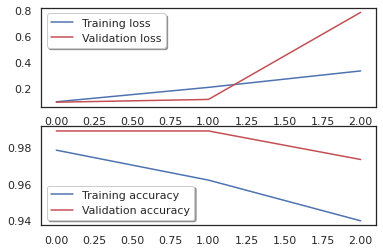

In [119]:
fig,ax=plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label='Training loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation loss',axes=ax[0])
legend=ax[0].legend(loc="best",shadow=True)
ax[1].plot(history.history['accuracy'],color='b',label='Training accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation accuracy',)
legend=ax[1].legend(loc='best',shadow=True)

In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  if(normalize):
    cm=cm.astype('float')
  thresh=cm.max()/2.0
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted Label")
  


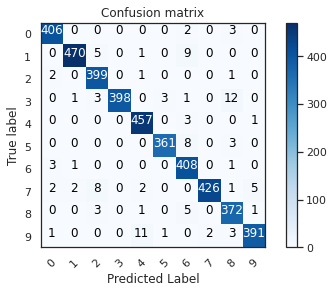

In [121]:
Y_pred=model.predict(X_val)
Y_pred_classes=np.argmax(Y_pred,axis=1)
Y_true=np.argmax(Y_val,axis=1)
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)

plot_confusion_matrix(confusion_mtx,classes=range(10))

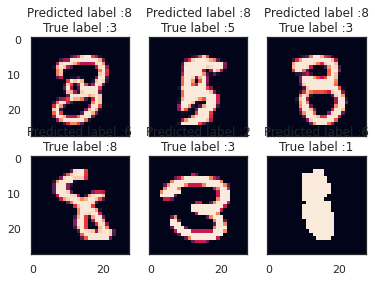

In [122]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1


Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)


true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))


delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors


sorted_dela_errors = np.argsort(delta_pred_true_errors)

 
most_important_errors = sorted_dela_errors[-6:]


display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [0]:
results=model.predict(tdata)
results=np.argmax(results,axis=1)
results=pd.Series(results,name='Label')

In [0]:
submission=pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)
submission.to_csv("result_minist.csv",index=False)